# Module 1 Final Project

For: Langleer Real Estate Associates

By: Jonathan E Ericksen, JE Consulting

## Background:

Langleer Real Estate Associates (LREA) has contracted with JE Consulting to develop a statistical model to predict housing prices within the greater King Country territory. The intent is to provide a tool by which LREA agents can leverage when consulting with clients who are looking to sell their real estate holdings. 

The content herin describes the methodology and technical steps used by JE Consulting to develop and improve the predictive regression model to be used by the client. 

## Objective:

LREA has contracted with JE Consulting to build a multi-variate regression model that accuratley predicts housing prices throughout the King County territory. The resulting model will be used by the LEAR associates as a tool to  engage when consulting with prospective sellers on a price to list their property on the market. Further, this model will be used in consultation with future prospective sellers as to the 

Upon completion, the model will exist within the confines of LEAR's current technology stack, and later used as an engine to drive a mobile application for use by agents in the field. The mobile application will take in existing parameters on a given property, provide an estimated sale price, followed by an explatory workflow whereby agents can run hypothetical scenarios on potential property improvements and the effect on future sale price.

In addition to developing a predictive model, LREA would like these key questions answered through detailed visualizations from the existing data: 

- How are housing prices (home values) distributed throughout King County? And what explains the concentration of expensive housing in the northeast corner of the county?
- Does the age of the house have a noticeable impact on value?
- Does King County exhibit any seasonality in terms of housing inventory turnover?


## Methodology:

This project followed the industry standard OSEMiN process through model development and EDA. The 5 stages in OSEMiN are outlined below with each stage highlighted within the ensuing notebook:

- Obtain: Sroucing data
- Scrub: Data processing, cleaning & wrangling
- Explore: Analyze data distributions, check for coliniearity, build data visualizations
- Model: Apply regression modeling to final data set
- Interpret: Interpret the final results explaining the implications of the resulting coefficents & predictions
------------------------------------------------------------------------------------------------------------------

### Obtaining The Data

Section Highlights:
- Import applicable libraries/packages
- Import data file as a pandas dataframe and assign it to the variable 'df' for initial analysis

------------------------------------------------------------------------------------------------------------------

*Import applicable libraries/packages*

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.stats as sts
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

*Importing the data file using pandas and storing it as a datafram assigned to the variable 'df'*

In [2]:
df = pd.read_csv('kc_house_data.csv')

### Scrubbing The Data

Section Highlights:
- Data familiarization (five point statistics)
- Removed ambiguous columns
- Removed rows with null values in the 'view' column 
- Replaced null values in the 'waterfront' column with the column median value
- Replaced the placeholder data ('?') in the 'sqft_basement' feature with the median column value

------------------------------------------------------------------------------------------------------------------

*Inspecting the columns from the dataset*

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

*Inspecting the dataframe shape*

In [4]:
df.shape

(21597, 21)

*Inspecting the dataframe head*

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


*Inspect the data types as well as data volumes. Looking for missing values within the given features*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


*Analyzing the five point statistics while rounding resulting output to 2 decimal points*

In [7]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


*After familiarizing myself with the data through initial observations, I've decided to remove the 'id' and 'yr_renovated' columns due to the ambiguos nature of these data, i.e., 'renovations' is subjective term and 'id' is not needed for any statistical analysis.*

In [8]:
df.drop(columns = ['id', 'yr_renovated'], inplace = True, axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(2)
memory usage: 3.1+ MB


*Sought the variables with missing values while calculating the total percentage of null values against the 
total dataset count*

In [10]:
(df.isna().sum() / len(df))*100

date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

*Decided to remove rows with null values in the 'view' column after determining there would be only .3% amount of data loss*

In [11]:
df.dropna(how = 'any', axis = 0, subset = ['view'], inplace=True)

*Viewing the 'waterfront' histogram to better understand the distribution of values*

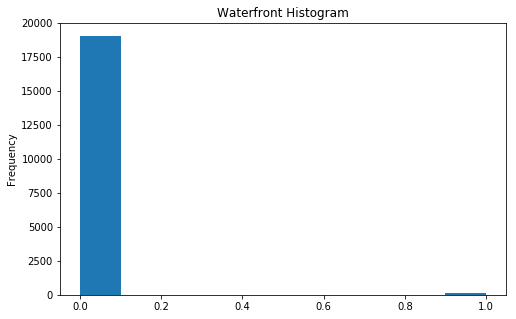

In [12]:
df['waterfront'].plot(kind='hist', figsize = (8,5), title = 'Waterfront Histogram')
plt.show()

*Calculated the median 'waterfront' value to ensure it matches what the histogram above indicates*

In [13]:
df.waterfront.median()

0.0

*Replaced the 'waterfront' null values with the median value for the feature, which is 0*


In [14]:
df.waterfront = df.waterfront.fillna(value = df.waterfront.median())

*Casting the Confirming the 'waterfront' variable has been recasted to an int64 datatype*

In [15]:
#df.waterfront.astype(float)
#df.waterfront.dtype

*Confirming all null values have been removed from the dataset*

In [16]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

*Identifying data in the 'sqft_basement' feature that are not integers as the datatype is currently recognized as a string*

*Summing the count of string characters in the 'sqft_basement' variable*

In [17]:
print(df['sqft_basement'].head())

print((df['sqft_basement'] == '?').sum())

print(df['sqft_basement'].describe())

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object
452
count     21534
unique      302
top         0.0
freq      12798
Name: sqft_basement, dtype: object


*Developed a for loop to cycle through the 'sqft_basement' and for each float value, appended to the 'basement_vals'
list. From there, we calculated the mean value for all the values extracted from the 'sqft_basement' feature that now exists in the newly created 'basement_vals' list*

In [18]:
basement_vals = []

for footage in df.sqft_basement:
    try:
        basement_vals.append(float(footage))
    except:
        continue

sqft_mean = np.mean(basement_vals).round(2)
sqft_mean

291.36

*With the mean calculated above, I'm replacing all of the '?' placeholder values with the mean value for 'sqft_basement'*

*I confirmed all '?' characters were removed usint the print sum statement*

In [19]:
df.sqft_basement.replace(to_replace = '?', value = sqft_mean, inplace = True)

print((df['sqft_basement'] == '?').sum())

0


*Casting the 'sqft_basement' variable to a float from string*

In [20]:
df.sqft_basement.dtype

dtype('O')

In [21]:
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

df.sqft_basement.dtype

dtype('int64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 19 columns):
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null int64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 3.3+ MB


### Exploring The Data

Answered the following questions through visualizations based on the original dataset:
- How are housing prices (home values) distributed throughout King County? And what explains the concentration of expensive housing in the northeast corner of the county?
- Does the age of the house have a noticeable impact on value?
- Does King County exhibit any seasonality in terms of housing inventory turnover?

Further explored the relationship among the variables while trimming the dataset in preparation for building our
modeling

--------------------------------------------------------------------------------------------------------------

##### Question One: 

How are housing prices (home values) distributed throughout King County? And what explains the concentration of expensive housing in the northeast corner of the county?

*The graphic below functions as a heatmap using the positional data, 'long' and 'lat', to creat a layout depicting the price of house with a color scale throughout King County *

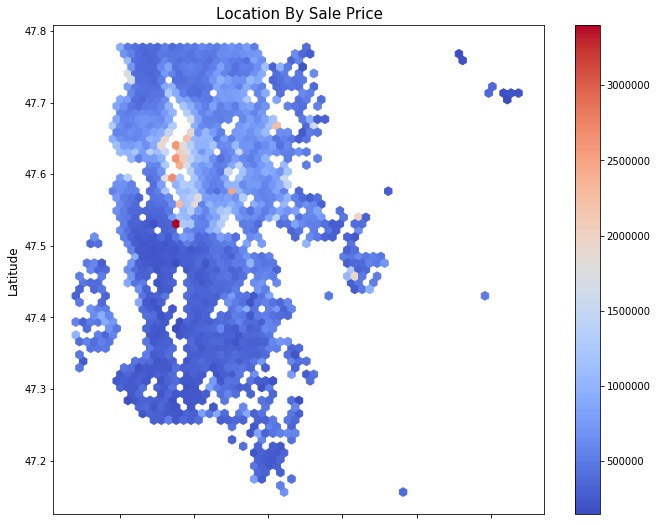

In [23]:
df.plot.hexbin(x = 'long', y = 'lat', C = 'price', gridsize = 60, cmap = 'coolwarm', figsize = (11, 9))

plt.title('Location By Sale Price', fontsize = 15)
plt.ylabel('Latitude', fontsize = 12)
plt.xlabel('Longitude', fontsize = 12)
plt.show()

*Below is an import of a map image of King County to reference against home values distributed throughout King County from the graphic above*

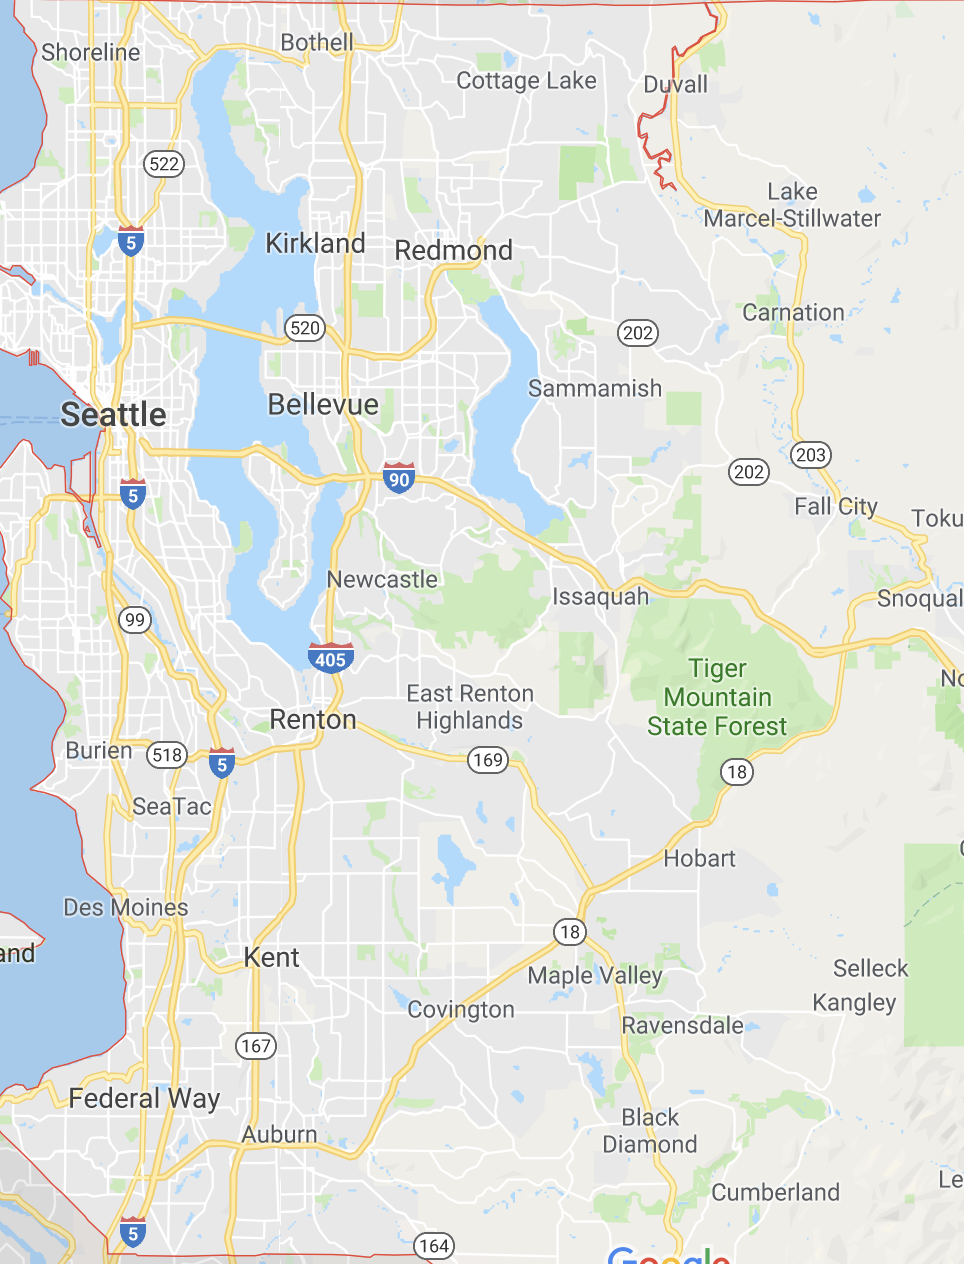

In [24]:
from IPython.display import Image
Image(filename = 'King County Metro Area.png', width=400, height=400)

##### Question One - Answer:

The distribution of home values throughout King County highlight a stark concentration of higher valued homes around the Kirkland area. This is likely explained due to it's proximity to highly concentrated white collar work environments, and close proximity to shopping, eateries, et cetera. 

Further, housing prices are likely exacerbated by proximity to Lake Washington. As per convention, lakeside housing prices are often correlated with higher prices based on quality water views, access to beaches, and recreation.

It's likely these are two contributing factors to the concentration of highly priced housing units. 

--------------------------------------------------------------------------------------------------------------

##### Question Two: 

Does the age of the house have a noticeable impact on value?

*Using the seaborn jointplot method to plot house age against price during the time period for which sales data was 
captured*

ValueError: Could not interpret input 'yr_built'

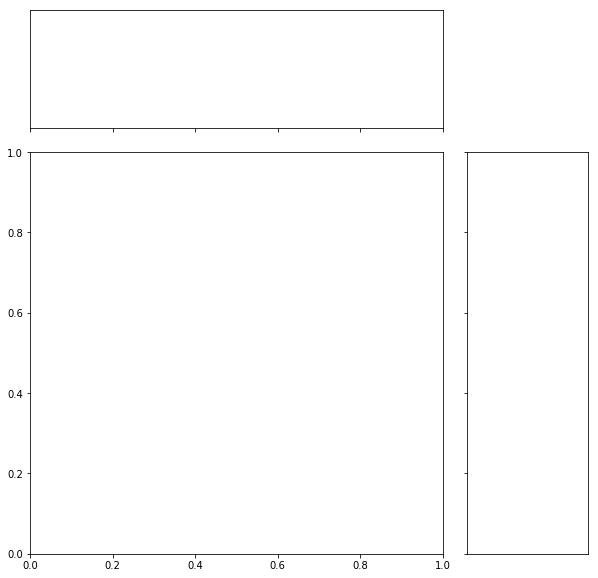

In [79]:
sns.jointplot(x = 'yr_built', y = 'price' , data = df, kind = 'reg', height = 10, xlim = (1895, 2020), 
              color = 'g', ratio = 3)

plt.title('Sale Price by Year Built', fontsize = 15)
plt.ylabel('Sell Price', fontsize = 14)
plt.xlabel('Year Built', fontsize = 14)
plt.show()

##### Question Two - Answer:

Based on the scatter plot above, which plots the age of the house against the price, it seems there is no clear impact from age on sale price. The jointplot includes a regression line as seen on either side of the plotted points. This regression line indicates little to no correlation between sale price and the age of the house.

Further, histogram plots are included opposite to the variable axis to visualize the distribtion of housing age and price. Of note, it there was a greater number of sales for newer properties while the sale price is normally distributed around the $500,000 price point with multiple higher valued properties serving as outliers.  

--------------------------------------------------------------------------------------------------------------

#### Question Three: 

Does King County exhibit any seasonality in terms of housing inventory turnover?

*To answer this question, I began by casting the 'date' variable to a datetime series from an object data type for graphing a distribution plot of total housing sales by month*

In [26]:
df.date.dtype

dtype('O')

In [27]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

df.date.dtype

dtype('<M8[ns]')

*Adding a new column to the dateframe that captures the numeric number of the month as an 'int' datatype*

In [28]:
df["month"] = df.date.dt.month
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,291.352419,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502,6.575555
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,437.344155,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308,3.113740
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000,9.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


*In order to properly label the months, I created a list of the months in a year to later combine with the 'month' column*

In [29]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [30]:
month_map = dict(zip(range(1, 13), months))

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,2


In [32]:
df["month_name"] = df["month"].map(month_map)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,month_name
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0,1955,98178,47.5112,-122.257,1340,5650,10,Oct
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400,1951,98125,47.7210,-122.319,1690,7639,12,Dec
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0,1933,98028,47.7379,-122.233,2720,8062,2,Feb
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910,1965,98136,47.5208,-122.393,1360,5000,12,Dec
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0,1987,98074,47.6168,-122.045,1800,7503,2,Feb


*Plotting the visualization which aggregates home sales by month*

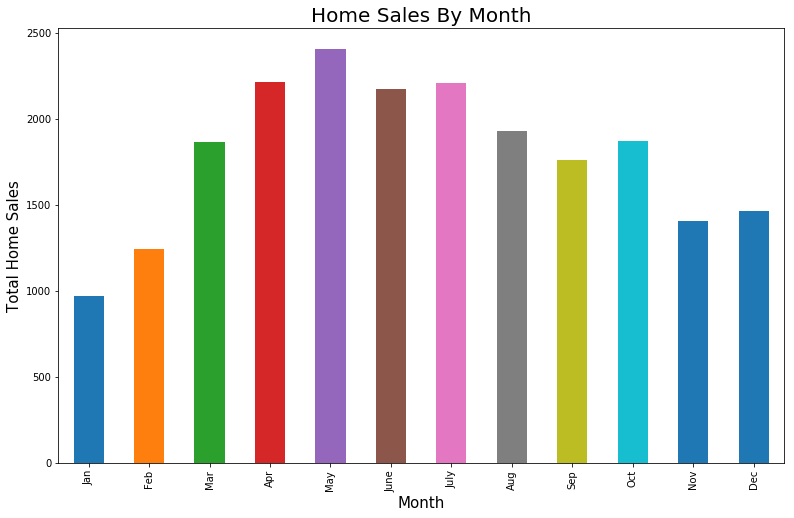

In [33]:
plt.figure(figsize = (13,8))
ax = df["month"].value_counts().sort_index().plot(kind='bar')

plt.title("Home Sales By Month", fontsize = 20)
plt.ylabel('Total Home Sales', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks(ticks=range(12), labels=months)

plt.show()

#### Question Three - Answer: 

From the histogram above, it's clear inventory turnover is lowest during the winter months with January having less than 1,000 closings throughout King County. The month of May had the highest turnover with roughly 2,400 closings. That's more than double housing sales from January. More broadly, the spring and summer months saw much higher turnover than the winter months. 

The obvious implaction for LREA is to adjust the necessary resources to account for lower sales volumes during the winter months, i.e., prepare for cashflow variations throughout the fiscal year, increase marketing spend during the winter months to boost sales (commisions), and offer incentives for sellers during December and January. 

--------------------------------------------------------------------------------------------------------------

In [34]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'month_name'],
      dtype='object')

#### Data Exploration - Conditioning the Data

*In preparation for modeling the data, I began by running a few correlation matrices using a seaborn heatmap. This step is necessary for discovering feature that correlate with each other in addition to correlation with the target variable.*

*I began with running a correlation matrix using all remaining features from the dataframe.* 

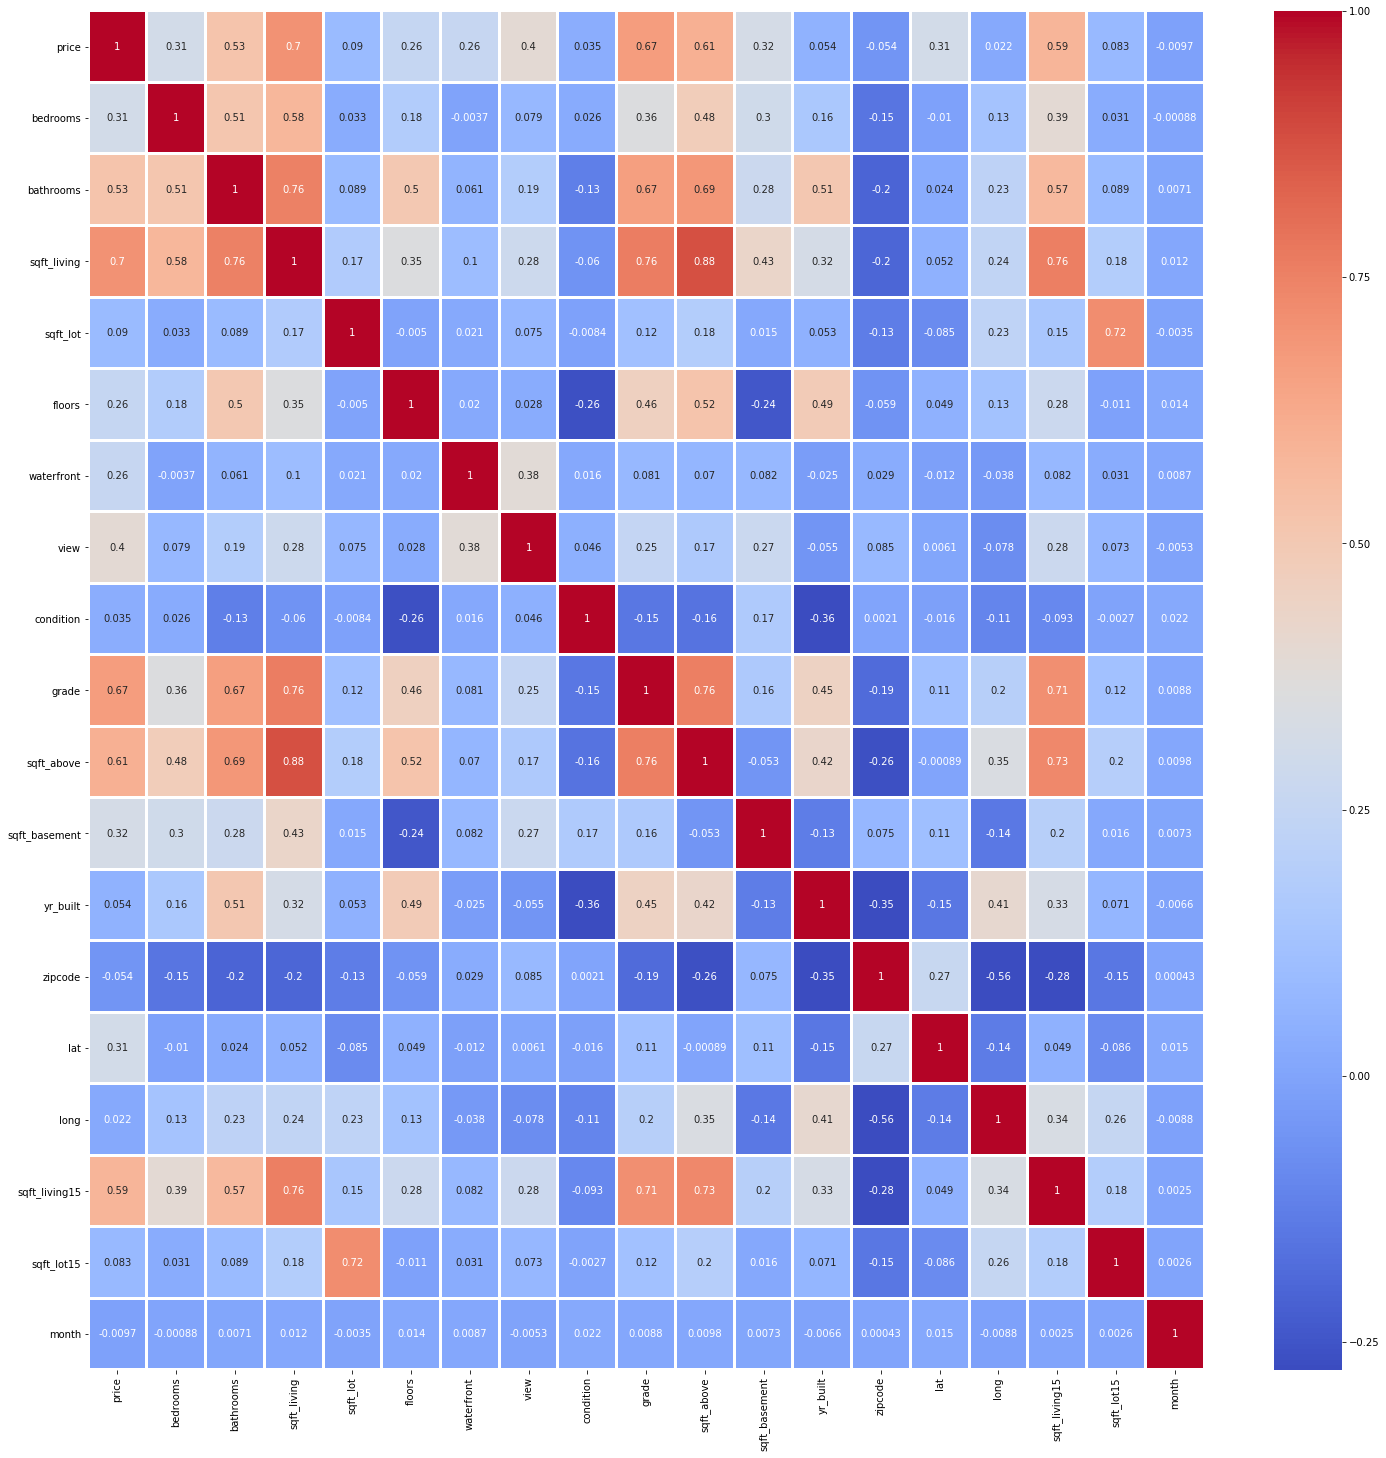

In [35]:
corr = df.corr()
plt.figure(figsize = (25, 25))
sns.heatmap(corr, fmt='.2g', cmap = 'coolwarm', annot = True, linewidth = 2, robust = True)
plt.show()

*After reviewing the metadata and correlation matrix, I've decided to remove the 'date', 'month', 'sqft_lot15', 'long', 'lat', 'zipcode', 'yr_built', 'condition', 'waterfront', 'sqft_lot' features based on poor corelations with the predicted variable, 'price'.*

In [36]:
df.drop(columns = ['date','month', 'sqft_lot15', 'long', 'lat', 'zipcode', 'yr_built', 
                   'condition', 'waterfront','sqft_lot', 'month_name'], axis=1, inplace=True)

*Confirming the desired remaining features were not removed by calling the columns*

In [37]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'sqft_living15'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 10 columns):
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
floors           21534 non-null float64
view             21534 non-null float64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null int64
sqft_living15    21534 non-null int64
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


*Checking for correlation and multicolinearity among the remaining variables*

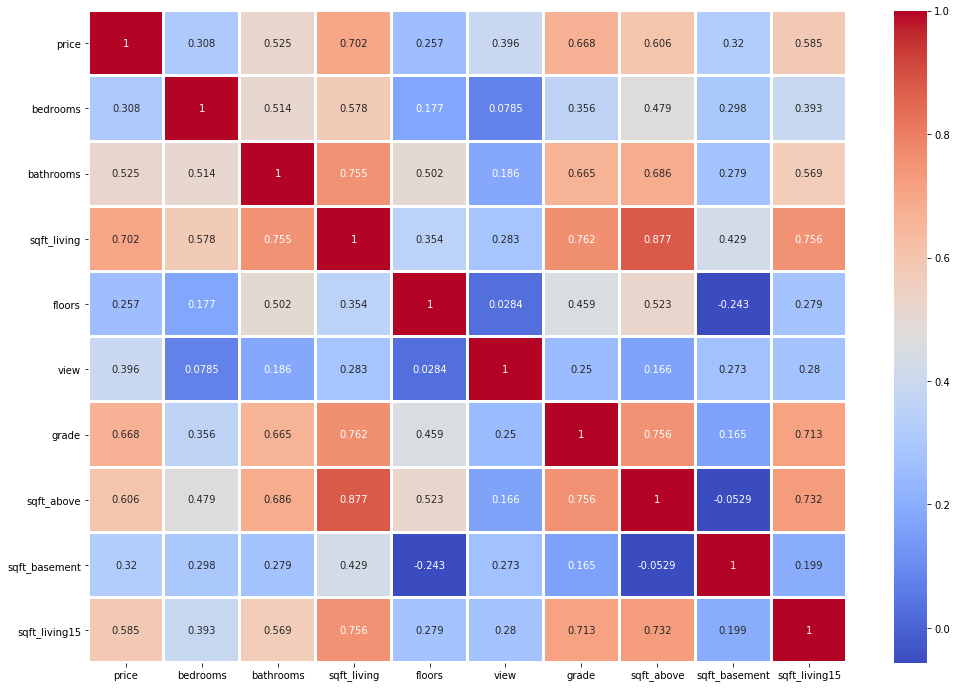

In [39]:
corr = df.corr()
plt.figure(figsize=(17, 12))
sns.heatmap(corr, fmt='.3g', cmap = 'coolwarm', annot = True, linewidth = 2, robust = True, )
plt.show()

*After rerunning the correlation matrix, I decided to further drop 'floor' column due to low correlation with price*

In [40]:
df.drop(columns = ['floors'], axis=1, inplace=True)

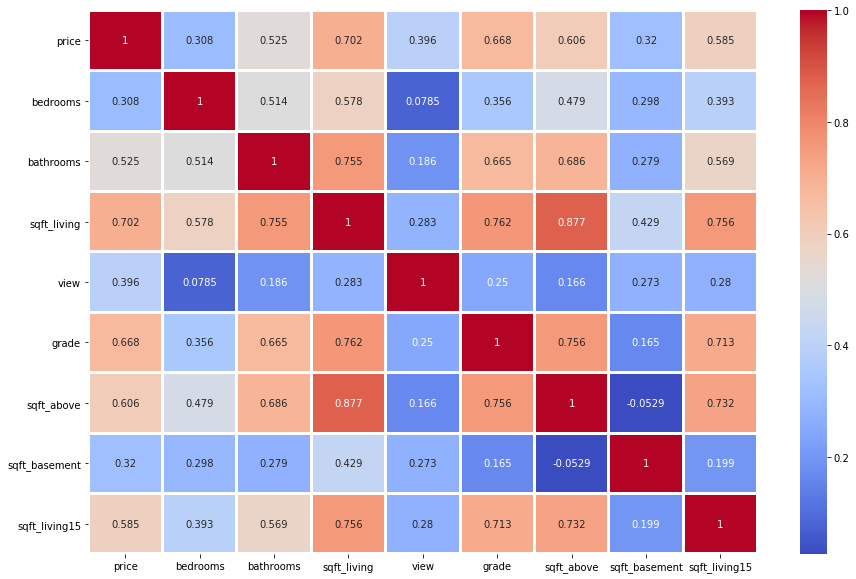

In [41]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, fmt='.3g', cmap = 'coolwarm', annot = True, linewidth = 2, robust = True)
plt.show()

*Further removed the 'sqft_living' and 'sqft_living15' due to colinearity with multiple other features. The intent here is to keep features of properties within the model that clients can influence that would increase the value of the property by a predicted amount, i.e., adding a bathroom would increase house value by x amount, et cetera*


In [42]:
df.drop(columns = ['sqft_living', 'sqft_living15'], axis=1, inplace=True)

In [43]:
df.shape

(21534, 7)

*Analyzing the distribution among the variables*

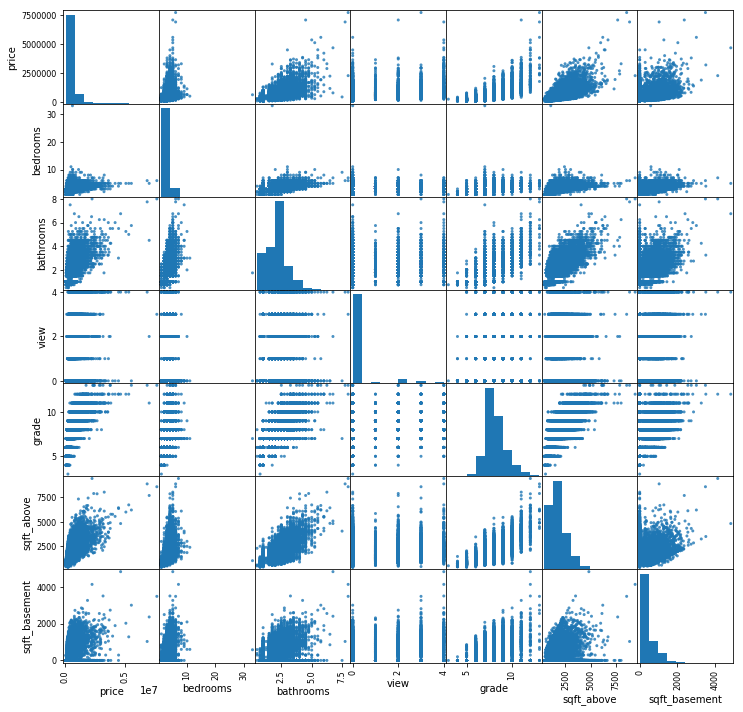

In [45]:
pd.plotting.scatter_matrix(df, figsize = (12,12), diagonal='hist', alpha = .8, )
plt.show()

*After narrowing down the desired features based on correlation and colinearity, I ran a log transformation on some of the skewed predictor variables to assess the impact on skewness of the distribution. I plotted the distribution both before and after the log transformation in addition to the skewness scores to determin whether or not to keep the log transformed variable in the final model.*

##### sqft_basement

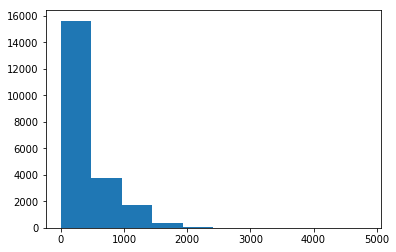

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


ValueError: supplied range of [-inf, 8.480529207044645] is not finite

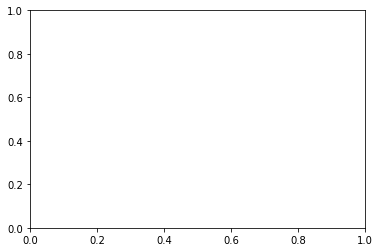

In [47]:
plt.hist(df.sqft_basement)
plt.show()

df['log_sqft_basement'] = np.log(df.sqft_basement)

plt.hist(df.log_sqft_basement)
plt.show()

stats.skew(df.sqft_basement), stats.skew(df.log_sqft_basement)

##### sqft_above

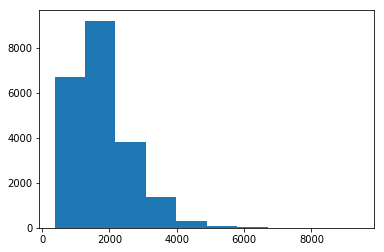

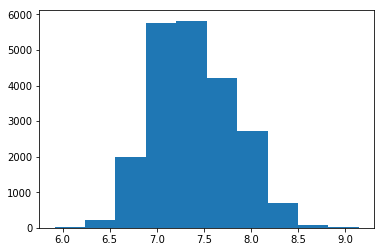

(1.4477434946818823, 0.25937413548432464)

In [48]:
plt.hist(df.sqft_above)
plt.show()

df['log_sqft_above'] = np.log(df.sqft_above)

plt.hist(df.log_sqft_above)
plt.show()

stats.skew(df.sqft_above), stats.skew(df.log_sqft_above)

##### bathrooms

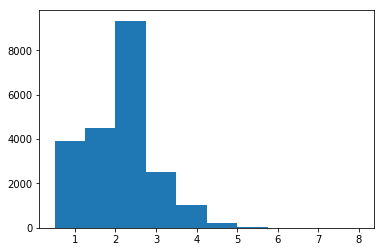

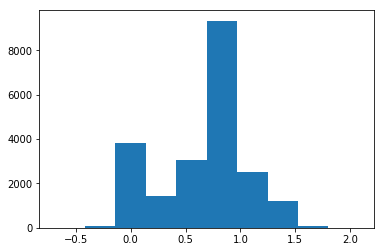

(0.5149989894015412, -0.49449779126552595)

In [49]:
plt.hist(df.bathrooms)
plt.show()

df['log_bathrooms'] = np.log(df.bathrooms)

plt.hist(df.log_bathrooms)
plt.show()

stats.skew(df.bathrooms), stats.skew(df.log_bathrooms)

##### bedrooms

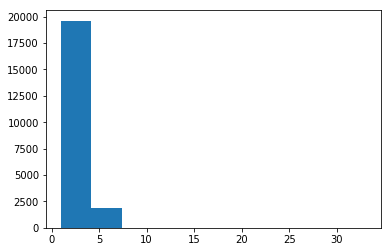

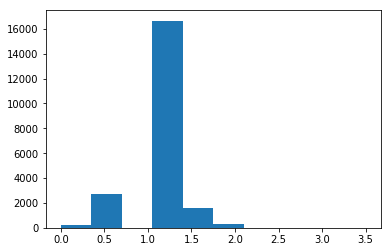

(2.026603760034393, -0.681868647030347)

In [50]:
plt.hist(df.bedrooms)
plt.show()

df['log_bedrooms'] = np.log(df.bedrooms)

plt.hist(df.log_bedrooms)
plt.show()

stats.skew(df.bedrooms), stats.skew(df.log_bedrooms)

##### view

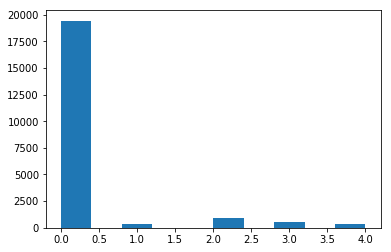

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


ValueError: supplied range of [-inf, 1.3862943611198906] is not finite

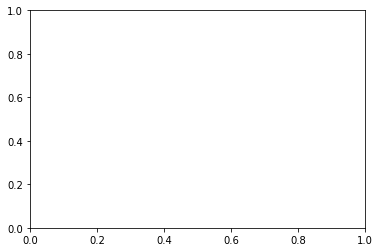

In [58]:
plt.hist(df.view)
plt.show()

df['log_view'] = np.log(df.view)

plt.hist(df.log_view)
plt.show()

stats.skew(df.view), stats.skew(df.log_view)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 12 columns):
price                21534 non-null float64
bedrooms             21534 non-null int64
bathrooms            21534 non-null float64
view                 21534 non-null float64
grade                21534 non-null int64
sqft_above           21534 non-null int64
sqft_basement        21534 non-null int64
log_sqft_basement    21534 non-null float64
log_sqft_above       21534 non-null float64
log_bathrooms        21534 non-null float64
log_bedrooms         21534 non-null float64
log_view             21534 non-null float64
dtypes: float64(8), int64(4)
memory usage: 2.1 MB


### Modeling the Data

------------------------------------------------------------------------------------------------------------------

*To begin building the regression model, I first separated out the target variable from the remaining feature variables*

In [71]:
# had to drop 'log_bedrooms', 'log_view', 'log_sqft_basement' based on infinite figures

y = df['price']

x = df.drop(['price', 'log_bedrooms', 'log_view', 'log_sqft_basement'], axis=1)

In [72]:
x.head()

,bedrooms,bathrooms,view,grade,sqft_above,sqft_basement,log_sqft_above,log_bathrooms
0,3,1.00,0.0,7,1180,0,7.073270,0.000000
1,3,2.25,0.0,7,2170,400,7.682482,0.810930
2,2,1.00,0.0,6,770,0,6.646391,0.000000
3,4,3.00,0.0,7,1050,910,6.956545,1.098612
4,3,2.00,0.0,8,1680,0,7.426549,0.693147


*Below, I'm creating a constant variable to run two models with and without the constant to compare and contrast it's effect on the R-squared value*

In [73]:
X = sm.add_constant(x)

*Running the initial model WITHOUT the constant*

In [74]:
linreg = sm.OLS(y, x).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 1.909e+04
Date:                Thu, 16 May 2019   Prob (F-statistic):               0.00
Time:                        21:38:34   Log-Likelihood:            -2.9635e+05
No. Observations:               21534   AIC:                         5.927e+05
Df Residuals:                   21526   BIC:                         5.928e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bedrooms        -1.71e+04   2179.633     -7.

In [76]:
linreg.params

bedrooms          -17101.401664
bathrooms         268805.217816
view               83596.484921
grade             114375.950118
sqft_above           208.922936
sqft_basement        204.390742
log_sqft_above   -124478.540724
log_bathrooms    -559795.518747
dtype: float64

*Ran the initial model with the constant and determined we do not need to use a constant going forward as it 
negai*

In [78]:
linreg = sm.OLS(y, X).fit()
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     4214.
Date:                Thu, 16 May 2019   Prob (F-statistic):               0.00
Time:                        21:47:14   Log-Likelihood:            -2.9627e+05
No. Observations:               21534   AIC:                         5.926e+05
Df Residuals:                   21525   BIC:                         5.926e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.306e+06   1.07e+05     12.

In [41]:
'''Removed the 'sqft_living15' feature as it's p value was above .05 '''

df.drop(['sqft_living15'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 11 columns):
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
waterfront       21534 non-null object
view             21534 non-null float64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
sqft_living15    21534 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 2.0+ MB


In [ ]:
linreg = sm.OLS(y, x).fit()
linreg.summary()

### Interpreting the Results - Model Summary:

- Model:
    - R-squared = XX --> XX predicts xx% of the variance for the target
    - F-statistic = XX

- Targets
    - p-value = 0 --> XX predicting target is not random
        - We have high confidence in our model
    - coef = XX --> has a positive correlation and is our slope for the features
    
- Residuals

    - Kurtosis = XX --> residuals fall outside of 3 standard deviations of the mean
    - Skewness = xx --> residuals are *symetric/not symmetric*
    - Jarque-Bera = XX --> measure of normality *was close to 0 which means normality*
    
#### Write UP

From the model above, the Prob(F-Test) indicates the features used in the model havce coefficients that are not equal to 0 with high confidence. We can that XX, given a coef of XX, has a *positive/negative* correlation with our target. We know this isn't random because our p-value is 0. Therefore, XX predicts XX% of the varience of the target. Our residual seem *normally* distributed, meaning our linear regression model *is/is not* favoring 1 side of the data. 
        
    
------------------------------------------------------------------------------------------------------------------

In [35]:
for col in df.columns:
    if col !='price':
        try:
            x = df[col]
            y = df['price']
            linreg = sm.OLS(y, x).fit()
            print("For {}".format(col))
            print(linreg.summary())
            print("\n\n")
        except:
            print("-"*100)
            print("{} is messing stuff up!!!!!".format(col))
            print("-"*100)

----------------------------------------------------------------------------------------------------
date is messing stuff up!!!!!
----------------------------------------------------------------------------------------------------
For bedrooms
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 5.332e+04
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        17:12:06   Log-Likelihood:            -3.0545e+05
No. Observations:               21534   AIC:                         6.109e+05
Df Residuals:                   21533   BIC:                         6.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust       